In [23]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

vT_plate = np.array([300,35, 2.85, 882e-3,82e-3,6e-3]) #kelvin
M = np.matrix([[0,0, 10, 0, 20, 30],[0,0, 20, 0, 10, 30],[0,0,20,0,20,20],[0,0,20,10,10,20]]) #RT plate, 50 K, 4K, still, CP, MXC
vP_cooling = np.array([30,1.5,40e-3,200e-6,19e-6]) #cooling power (watt) from 50 K to MXC


In [69]:
def bose_einst(T):
    frequency = 1e9
    omega = frequency/(2*np.pi)
    hbar = 1.0545718e-34  #1.0545718 × 10-34 m2 kg / s
    kB = 1.38064852e-23 #1.38064852 × 10-23 m2 kg s-2 K-1
    return 1/(np.exp(hbar*omega/(kB*T))-1)

In [70]:
def line_config(vattenuation_dB, vT_plate,vP_cooling):
    vattenuation = 10**(vattenuation_dB/10)
    att_coax_dB = 1.8 #dB, each coax
    vn_photons = np.zeros(np.size(vT_plate))
    
    vn_photons[0] = bose_einst(vT_plate[0])
    
    for i in range(1,np.size(vT_plate)):
        vn_photons[i] = vn_photons[i-1] / vattenuation[i] + (vattenuation[i] - 1) / vattenuation[i] * bose_einst(vT_plate[i])


    P_in_dBm = -78 #dBm

    vP_diss = np.zeros(np.size(vT_plate)-1)

    for i in range(np.size(vT_plate)-1):
        P_in = 1e-3*10**(P_in_dBm/10) #watt
        vP_diss[i] = P_in*(1-10**(-(vattenuation_dB[i+1]+att_coax_dB)/10))
        P_in_dBm = P_in_dBm - vattenuation_dB[i+1]
    return vn_photons[-1], vP_diss/vP_cooling

In [71]:
#fig5
n_photons_MC = np.zeros(len(M))
power_ratio = np.zeros((len(M),len(vP_cooling)))
for i in range(len(M)):
    vattenuation_dB = np.squeeze(np.asarray(M[i,:]))

    n_photons_MC[i], power_ratio[i,:] = line_config(vattenuation_dB,vT_plate,vP_cooling)

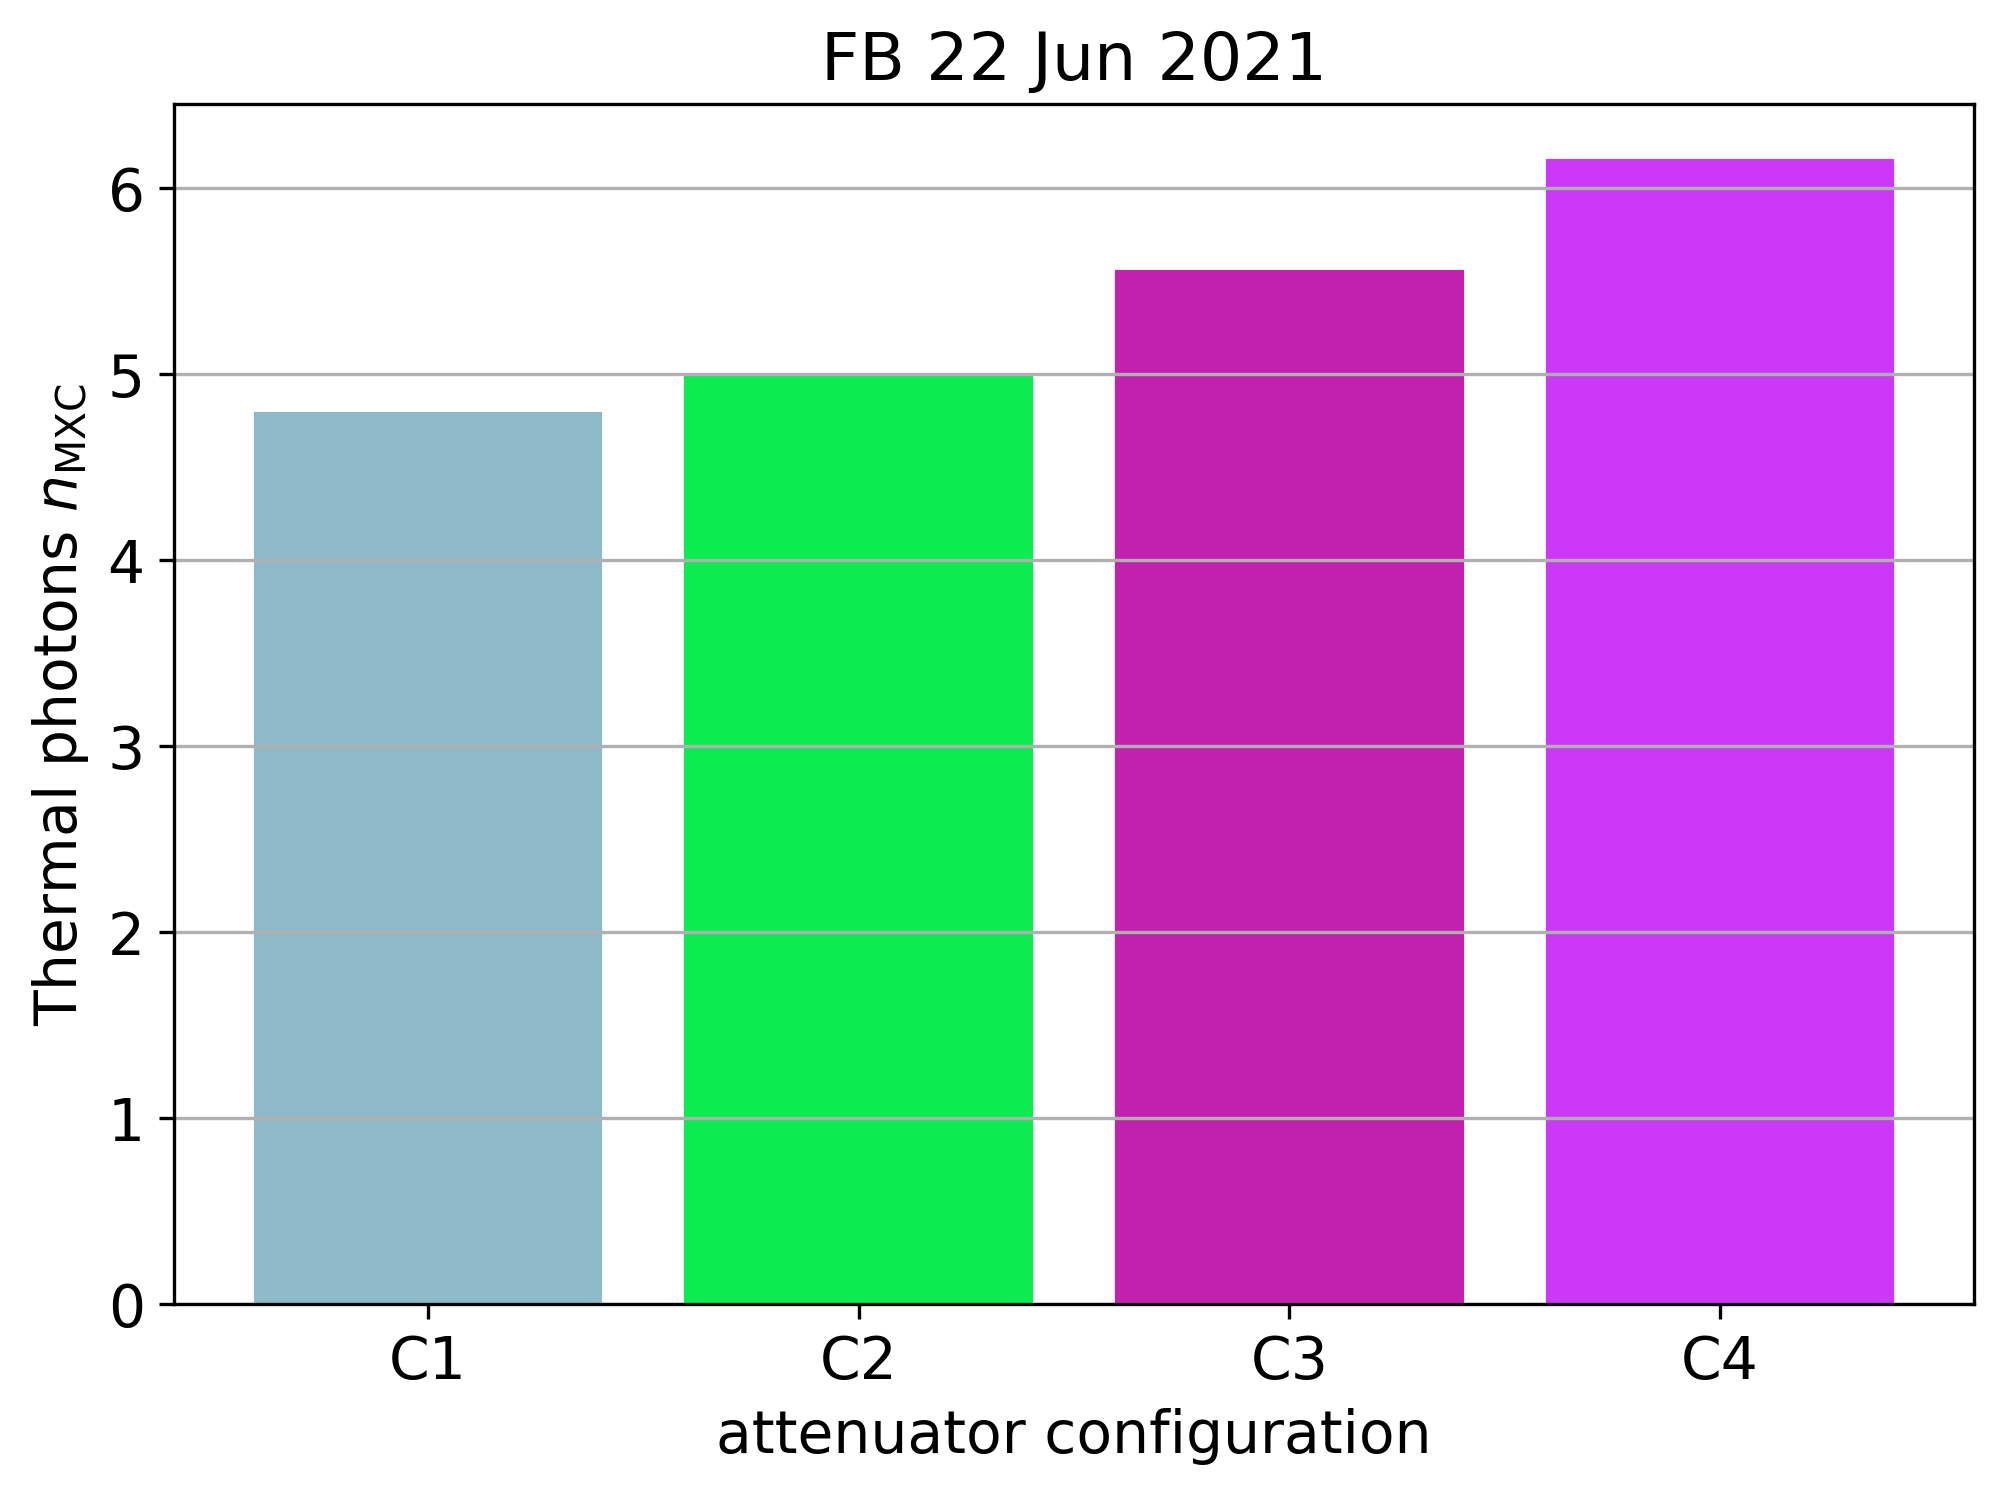

In [72]:
#fig 5a
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lst = range(1,len(M)+1)
langs = ["C{:01d}".format(x) for x in lst]
#langs = ['C1','C2','C3','C4']
barlist = ax.bar(langs,n_photons_MC)

plt.title('FB 22 Jun 2021', size = 16)
plt.xlabel('attenuator configuration',size= 14)
plt.ylabel('Thermal photons $n_\mathrm{MXC}$', size = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.yaxis.grid()
colors = np.random.rand(len(M),3)
for i in range(len(M)):
    barlist[i].set_color(colors[i])
plt.show()

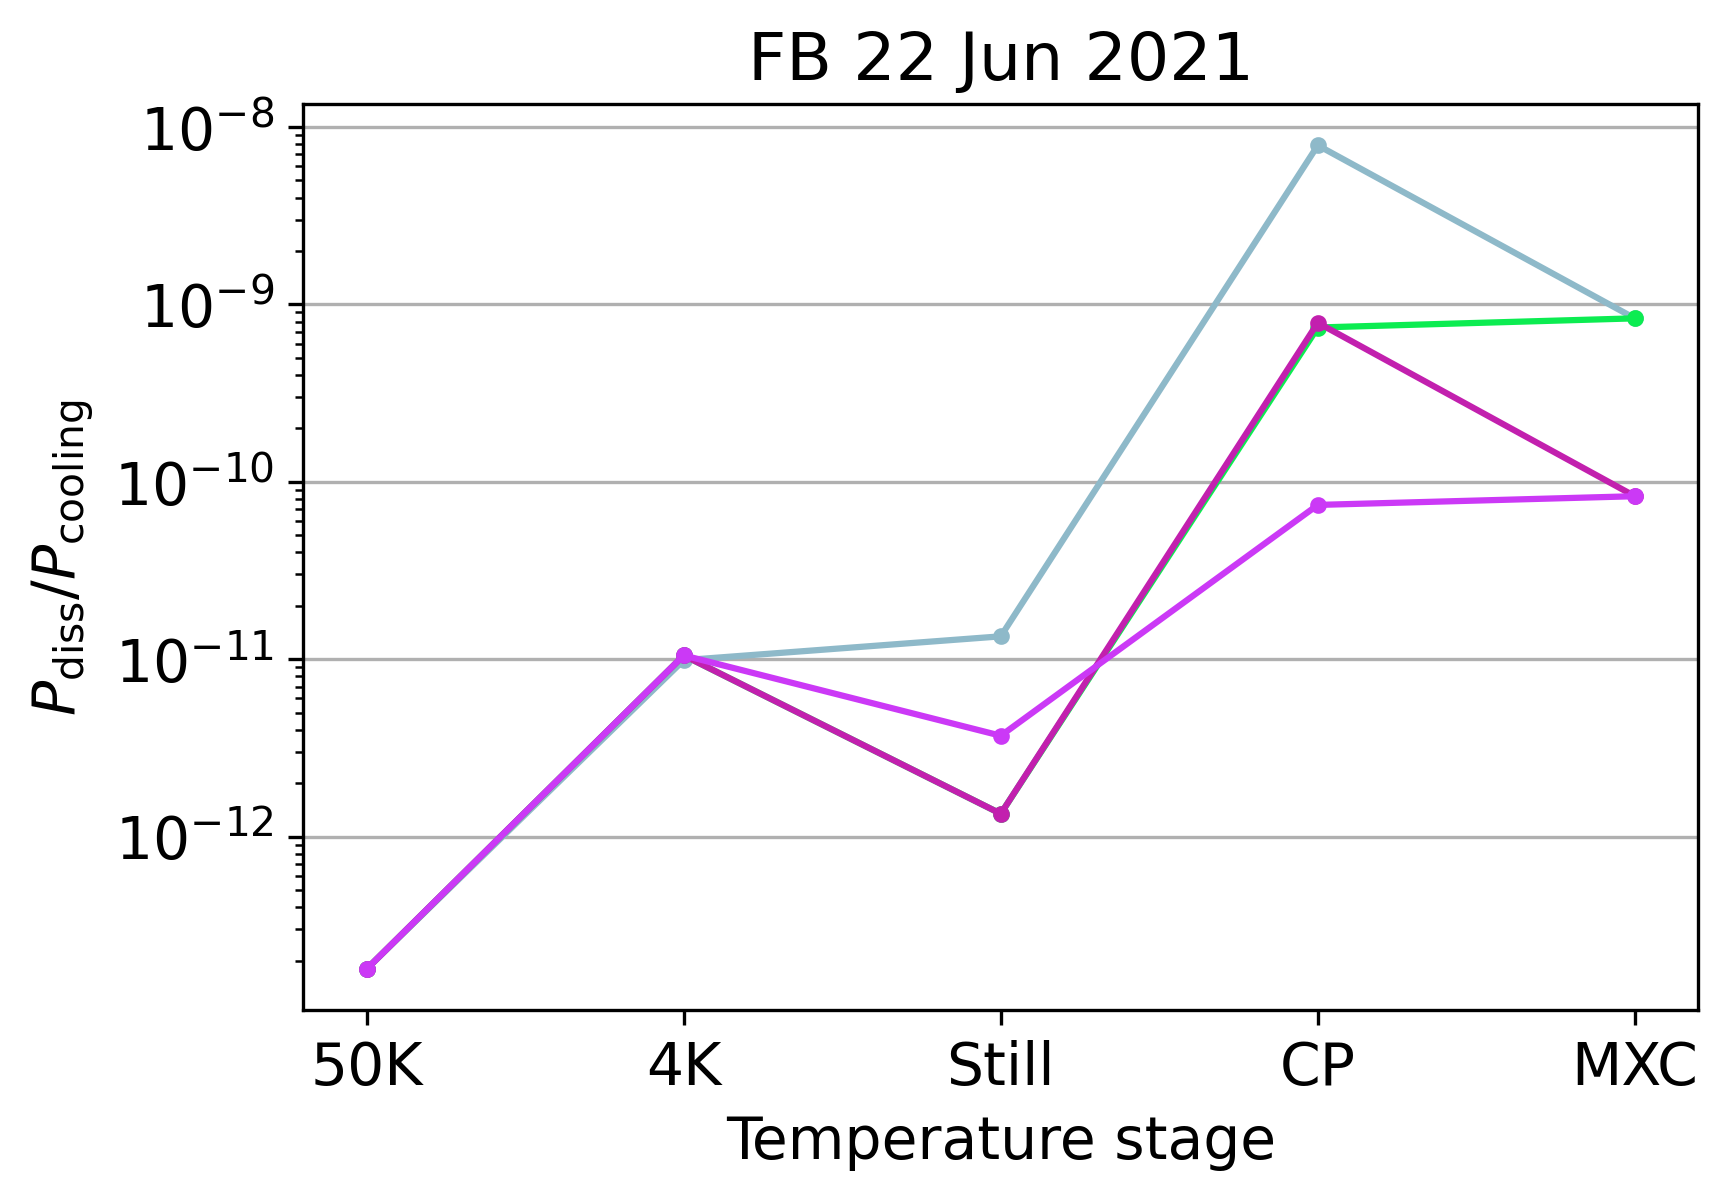

In [73]:
#fig 5b
plt.figure()
x = np.linspace(1,5,5)
my_xticks = ['50K','4K','Still','CP', 'MXC']
plt.xticks(x, my_xticks)
for i in range(len(M)):
     plt.plot(x, power_ratio[i,:], c =colors[i], marker = "." )
    
plt.title('FB 22 Jun 2021', size = 16)
plt.xlabel('Temperature stage',size= 14)
plt.ylabel('$P_\mathrm{diss}/P_{\mathrm{cooling}}$', size = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.yaxis.grid()
axes = plt.gca()
axes.yaxis.grid()
plt.yscale("log")
plt.show()
    

In [74]:
print('Configurations of attenuators [dB] from '+ my_xticks[0] +' (left) to MXC (right):')
print(M[:,1:])

Configurations of attenuators [dB] from 50K (left) to MXC (right):
[[ 0 10  0 20 30]
 [ 0 20  0 10 30]
 [ 0 20  0 20 20]
 [ 0 20 10 10 20]]
